# Modulador FM directa

En la FM directa se requiere que la frecuencia del oscilador de portadora varíe en forma correspondiente con la 
amplitud instantánea de la señal modulante. 

Con la FM directa, la desviación de frecuencia instantánea es directamente proporcional a la amplitud de la señal modulante. 

La figura muestra un diagrama esquemático para un generador de FM simple y directo. 

El circuito tanque formado por $L$ y $C$ determina la frecuencia para un oscilador estándar. 

Conforme el capacitor $C_m$ varía, la frecuencia de resonancia varía. 
Por lo tanto, la frecuencia de salida del oscilador varíadirectamente con la capacidad. 

Este circuito es de FM directa porque la frecuencia del oscilador se cambia directamente por la señal modulante y la magnitud del cambio de frecuencia es proporcional a la amplitud del voltajede la señal modulante.


![ex 2.13](fig/FMdirectaLC.png)


Del circuito de la figura

$$f_o = \frac{1}{2 \pi \sqrt{L C}}$$

Por lo tanto, las variaciones de $C$ modifican $f_o$

$$\Delta f_o = \frac{\partial f_o}{\partial C} \Delta C =  - \frac{1}{4 \pi \sqrt{L}} \cdot C^{-\frac{3}{2}} \Delta C$$


Luego

$$\frac{\Delta f_o}{f_o} =  \frac{- \frac{1}{4 \pi \sqrt{L C^3}} }{\frac{1}{2 \pi \sqrt{L C}}} \Delta C = -\frac{1}{2} \frac{\Delta C}{C}$$

 Expresión que vincula la variación relativa de frecuencia con la variación relativa de capacidad.
 




In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy                  # http://scipy.org/
from scipy import signal

from scipy.fftpack import fft, fftfreq
from time import time

from IPython.display import Image  
#%matplotlib inline
%matplotlib notebook
params = {'legend.fontsize': 14,
          'figure.figsize': (8, 8),
         'axes.labelsize': 14,
         'axes.titlesize': 14,
         'xtick.labelsize':14,
         'ytick.labelsize':14}

plt.rcParams.update(params) 

f = 1.59e+08 Hz


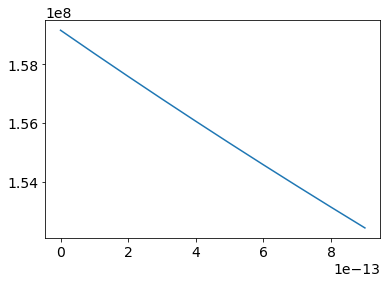

In [5]:
# Ejemplo

L = 100e-9
C = 10e-12

def freq(L,C):
    return 1/(2 * np.pi * (L*C)**.5)

f = freq(L,C)
print('f = {:1.2e} Hz'.format(f))


Cm = np.arange(0,1e-12,0.1e-12)

plt.plot(Cm, freq(L,C+Cm))

# FM directa usando un oscilador Clapps 

La manera más simple de lograrlo es usando un modulador de reactancia. 
Para su funcionamiento utiliza la señal modulante para modificar una reactancia en el circuito que determina la frecuencia. 
Una forma simple de construir un modulador de reactancia es instalar un varactor o diodo de reactancia variable dentro del circuito que determina la frecuencia en el oscilador de portadora. 

![ex 2.13](fig/FMdirectoColpitts.png)

En la figura se ilustra un circuitos sencillo que usa un oscilador Clapp.

El varactor tiene polarización inversa y ésta varía con la señal modulante.

 
## Diodo Varicap

El diodo varicap es un diodo que polirizado en inversa presenta una capacidad equivalente que se ajusta a la ecuación 

$$C_d = \frac{C_o}{\sqrt{1+ 2 |V_d|}}$$

donde 

$C =$ capacidad del diodo con polarización inversa (Faradios)

$V_d =$ voltaje de polarización inversa del diodo, siempre positiva. 

[simularVaricap](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwi-yPKljeXsAhX4GbkGHeBAC1MQFjAAegQIAxAC&url=https%3A%2F%2Fwww.skyworksinc.com%2F-%2Fmedia%2FSkyWorks%2FDocuments%2FProducts%2F1-100%2FVaractor_SPICE_Model_AN_200315C.pdf&usg=AOvVaw1uZuU9u5TmePifeXDtcD4C). 


In [6]:
def Ct(VR,Cj0, Vj, M, Cp, Rs, Ls):
    return Cj0/(1+VR/Vj)**M + Cp


smv = dict()
                  # CJO(F)    VJ(V)     M         CP(F) RS(Ω) Ls(Hy)
smv['SMV1234'] = ( 8.36e-12,   7.95,  3.96,  1.15e-12,  0.80, 1.4e-9)
smv['SMV2022'] = ( 7.30e-12,   4.00,  1.40,         0,   2.2, 1.5e-9)
smv['SMV1253'] = ( 51.8e-12,  73.60,  48.7,  2.70e-12,   1.1, 1.4e-9)
smv['SMV1213'] = ( 28.9e-12, 190.00, 105.0,  2.20e-12,   1.4, 1.5e-9)  
smv['SMV1470'] = (110.0e-12,  80.00,  39.7,  3.94e-12,   0.5, 1.4e-9)  
smv['SMV1430'] = ( 1.11e-12,  0.86,    0.5,  0.13e-12,  3.15, 1.4e-9) 
        

In [13]:
Cj01, Vj, M, Cp, Rs, Ls = smv['SMV1430']

print('.param Cjo1  =  {:3.2e}'.format(Cj01) )
print('.param M1    =  {:3.2f}'.format(M) )
print('.param Vj1   =  {:3.2f}'.format(Vj) )
print('.param Ls1   =  {:3.2e}'.format(Ls) )
print('.param Rs1    =  {:3.3f}'.format(Rs) )
print('.param Cp1   =  {:3.2e}'.format(Cp) )

.param Cjo1  =  1.11e-12
.param M1    =  0.50
.param Vj1   =  0.86
.param Ls1   =  1.40e-09
.param Rs1    =  3.150
.param Cp1   =  1.30e-13


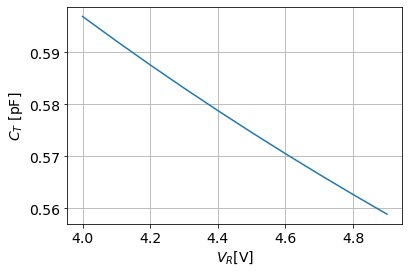

In [14]:
v = np.arange(4,5,0.1)

plt.plot(v,Ct(v,Cj01, Vj, M, Cp, Rs, Ls)/1e-12)

plt.ylabel('$C_T$ [pF]')
plt.xlabel('$V_R$[V]')
plt.grid()

Para el calculo de la admitancia de entrada $Y_i$

Del circuito C.A. podemos plantear

$$i_1 = v_i \cdot \frac{1}{(R+\frac{1}{S C})}$$

$$i_2 = g_m \cdot v_m$$

$$v_m = i_1 \cdot R$$

Entonces

$$v_m = v_i \cdot \frac{1}{(R+\frac{1}{S C})} \cdot R$$


Por lo tanto, $i_2$

$$i_2 = g_m \cdot v_i \cdot \frac{R}{(R+\frac{1}{S C})}$$

La corriente $i_i$ entonces

$$i_i = i_1 + i_2 = v_i \cdot \frac{1}{(R+\frac{1}{S C})} + g_m \cdot v_i \cdot \frac{R}{(R+\frac{1}{S C})}$$


La admintacia de entrada $Y_i$ es 

$$Y_i = \frac{i_i}{v_i} =  \frac{1}{(R+\frac{1}{S C})} + g_m \cdot \frac{R}{(R+\frac{1}{S C})}$$

$$Y_i =   \frac{1 + g_m R }{(R+\frac{1}{S C})}$$


$$Y_i =   \frac{SC \cdot (1 + g_m R) }{(SC R+1)}$$

Remplazando $S = j\omega$

$$Y_i =   \frac{j\omega C \cdot (1 + g_m R) }{( j\omega C R+1)}$$


Si $j\omega C R << 1$

$$Y_i =   j\omega C \cdot (1 + g_m R)$$

Así se consigue engañar al oscilador haciéndolo ver un capacitor cuyo valor de capacidad varía según la transconductancia gm del transistor.

La transconductancia se varía obviamente moviendo el punto de polarización. 


